In this notebook, I try to do EDA under two rules: clear and understandable. Wish you enjoy it!

Overview
1. Type 
2. Director
3. Cast/Actor
4. Country 
5. Date Added/Released Year
6. Rating
7. Duration
8. Genere

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import re
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
data.shape

(6234, 12)

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

# Type

In [5]:
show_type = data['type'].value_counts()
trace = go.Pie(labels = show_type.index, 
               values = show_type.values,
               hoverinfo = 'percent+value+label',
               textinfo = 'percent',
               textposition = 'inside',
               textfont = dict(size=14),
               title = 'TV Show & Movie',
               titlefont = dict(size=15),
               hole = 0.6,
               showlegend = True,
               marker = dict(line=dict(color='black',width=2)))
fig = go.Figure(data=[trace])
fig.update_layout(height=600,width=600)
fig.show()

About 70% of programs on Netflix in 2019 are movies.

# Director

Text(0.13, 0.95, 'Top10 Most Frequent Directors')

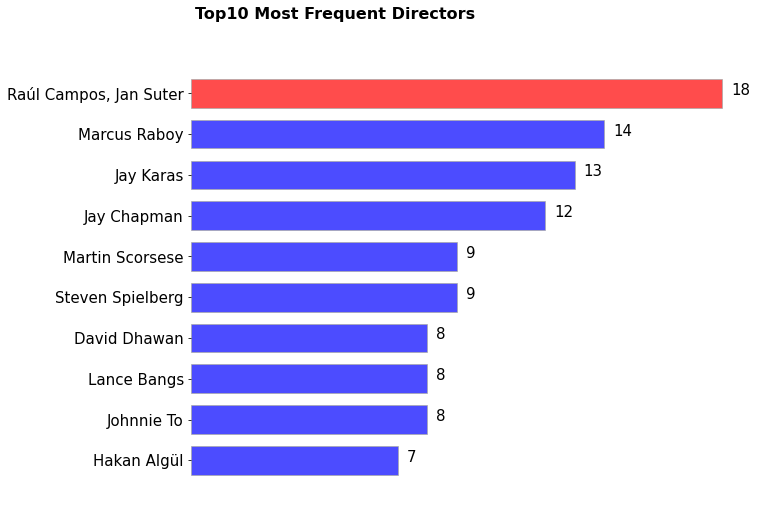

In [6]:
director_program_cnt = data.director.value_counts(ascending=False).head(10)
colors = [(0,0,1)]*10
colors[0] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.barh(director_program_cnt.index,director_program_cnt.values,
        height=0.7, edgecolor='darkgrey',color=colors, alpha=0.7)
ax.set_yticklabels(director_program_cnt.index,fontsize=15)
#ax.set_xticks(range(0,19,6))
ax.set_xticks([])

for i in ax.patches:
    #print(i.get_width(),i.get_y())
    ax.text(i.get_width()+.3, i.get_y()+.38,
            str(i.get_width()), 
            fontsize=15, color='black')
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='x',linestyle='-',alpha=0.4)
ax.invert_yaxis()
fig.text(0.13, 0.95, 'Top10 Most Frequent Directors', fontsize=16, fontweight='bold') 

1. 'Raúl Campos & Jan Suter' directed the most programs on Netflix in 2019.
2. More than half of the top10 most frequent directors are American directors.

Let us see how these top10 directors major in: movies or TV shows?

In [7]:
top10_director_data = np.empty((0,data.shape[1]))
for i in range(data.shape[0]):
    if data.loc[i,'director'] in director_program_cnt.index:
        top10_director_data = np.vstack((top10_director_data,data.iloc[i,:]))
top10_director_data = pd.DataFrame(top10_director_data)
top10_director_data.columns = data.columns

top10_director_data['cnt'] = 1
type_director_group = top10_director_data[['type','director','cnt']].groupby(['director','type']).agg('sum')
type_director_group = type_director_group.sort_values(by='cnt',ascending=False).reset_index()

In [8]:
fig = go.Figure(data=[go.Table(header=dict(values=['director', 'type','count'], 
                               fill_color='yellow', line_color='black'),
                               cells=dict(values=[type_director_group.director,type_director_group.type,type_director_group.cnt], 
                               fill_color='lavender', line_color='black'))])
fig.show()

It is interesting that almost all the programs that belong to top10 most frequent directors are movies.

# Cast/Actor

In [9]:
def cast_count(names):
    if not names:
        return 0 
    
    return len(names.split(','))

In [10]:
data['cast_cnt'] = data['cast'].astype(str).apply(lambda x: cast_count(x))
cast_cnt_title = data[['title','cast_cnt']]
top10_cast_cnt_title = cast_cnt_title.sort_values(by='cast_cnt',ascending=False).head(10)

Text(0.13, 0.95, 'Top10 Programs of Most Actors')

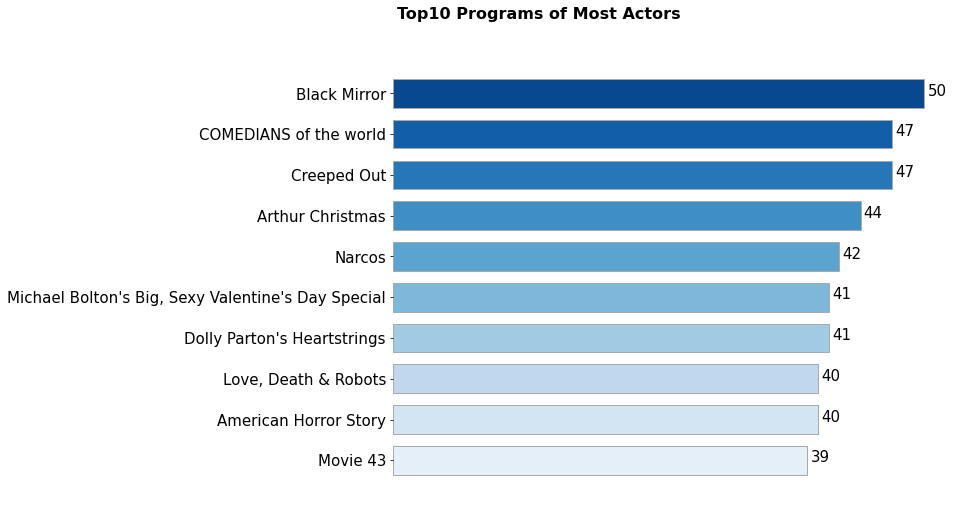

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.barh(top10_cast_cnt_title.title,top10_cast_cnt_title.cast_cnt,
        height=0.7, edgecolor='darkgrey',color=sns.color_palette('Blues_r',10) )
ax.set_yticklabels(top10_cast_cnt_title.title,fontsize=15)
#ax.set_xticks(range(0,51,5))
ax.set_xticks([])

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.4,
            str(i.get_width()), 
            fontsize=15, color='black')
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='x',linestyle='-',alpha=0.4)
ax.invert_yaxis()
fig.text(0.13, 0.95, 'Top10 Programs of Most Actors', fontsize=16, fontweight='bold')

'Black Mirror' has different actors in each episode because each episode tells a independent story. I enjoyed watching it too.

In [12]:
all_casts = []
for i in range(data.shape[0]):
    try:
        casts = data.loc[i,'cast'].split(',')
        all_casts += casts 
    except:
        pass 

cast_occur_count = pd.DataFrame(pd.DataFrame(all_casts).value_counts())
new_idx = [n[0] for n in cast_occur_count.index]
cast_occur_count['cast_name'] = new_idx
cast_occur_count.columns = ['cnt','cast_name']

Text(0.13, 0.95, 'Top10 Most Frequent Actors')

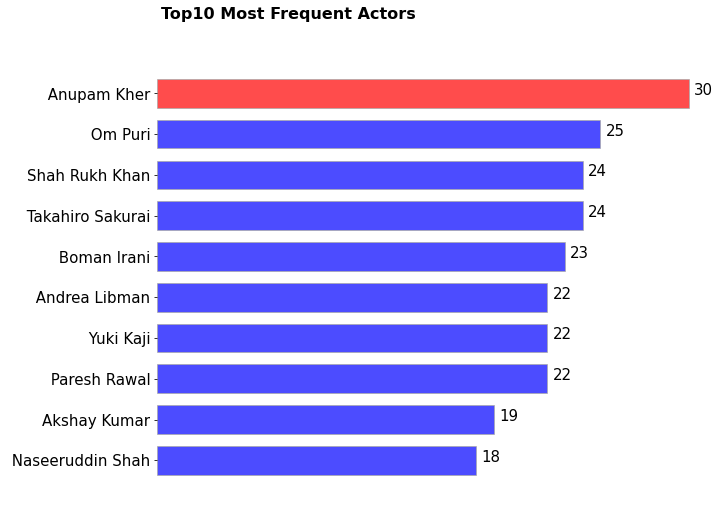

In [13]:
top10_cast_occur_count = cast_occur_count.head(10)
colors = [(0,0,1)]*10
colors[0] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.barh(top10_cast_occur_count.cast_name,top10_cast_occur_count.cnt,
        height=0.7, edgecolor='darkgrey',color=colors, alpha=0.7)
ax.set_yticklabels(top10_cast_occur_count.cast_name,fontsize=15)
#ax.set_xticks(range(0,31,5))
ax.set_xticks([])

for i in ax.patches:
    #print(i.get_width(),i.get_y())
    ax.text(i.get_width()+.3, i.get_y()+.38,
            str(i.get_width()), 
            fontsize=15, color='black')
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='x',linestyle='-',alpha=0.4)
ax.invert_yaxis()
fig.text(0.13, 0.95, 'Top10 Most Frequent Actors', fontsize=16, fontweight='bold') 

1. Top3 most frequent Actors are all Indian actors. 
2. More than half of the top10 most frequent actors are Indian actors

In [14]:
cast_cnt_type = data[['type','cast_cnt']]
movie = cast_cnt_type[cast_cnt_type.type=='Movie'].reset_index()
tv = cast_cnt_type[cast_cnt_type.type=='TV Show'].reset_index()

In [15]:
def cast_cnt_movie(cnt):
    if cnt<=5:
        return '0~5'
        
    elif cnt<=10 and cnt>5:
        return '5~10'
        
    elif cnt<=15 and cnt>10:
        return '10~15'
        
    else:
        return '>15'

In [16]:
movie['cast_cnt_group'] = movie['cast_cnt'].apply(lambda x: cast_cnt_movie(x))
movie_cast_cnt_group = movie['cast_cnt_group'].value_counts()
trace = go.Pie(labels = movie_cast_cnt_group.index, 
               values = movie_cast_cnt_group.values,
               hoverinfo = 'percent+value+label',
               textinfo = 'percent',
               textposition = 'inside',
               textfont = dict(size=14),
               title = 'Cast Number of Movies',
               titlefont = dict(size=15),
               hole = 0.6,
               showlegend = True,
               marker = dict(line=dict(color='black',width=2)))
fig = go.Figure(data=[trace])
fig.show()

Nearly 90% of movies on Netflix in 2019 has less than 10 actors.

In [17]:
tv['cast_cnt_group'] = tv['cast_cnt'].apply(lambda x: cast_cnt_movie(x))
tv_cast_cnt_group = tv['cast_cnt_group'].value_counts()
trace = go.Pie(labels = tv_cast_cnt_group.index, 
               values = tv_cast_cnt_group.values,
               hoverinfo = 'percent+value+label',
               textinfo = 'percent',
               textposition = 'inside',
               textfont = dict(size=14),
               title = 'Cast Number of TV Shows',
               titlefont = dict(size=15),
               hole = 0.6,
               showlegend = True,
               marker = dict(line=dict(color='black',width=2)))
fig = go.Figure(data=[trace])
fig.show()

80% of TV shows on Netflix in 2019 has less than 10 actors.

In [18]:
cnt_group_order = ['0~5','5~10','10~15','>15']
movie_cast_cnt_group = movie_cast_cnt_group.reindex(cnt_group_order)
tv_cast_cnt_group = tv_cast_cnt_group.reindex(cnt_group_order)
tv_cast_cnt_group = pd.DataFrame(tv_cast_cnt_group)
tv_cast_cnt_group['cast_cnt_group'] = tv_cast_cnt_group['cast_cnt_group'].apply(lambda x:-x)

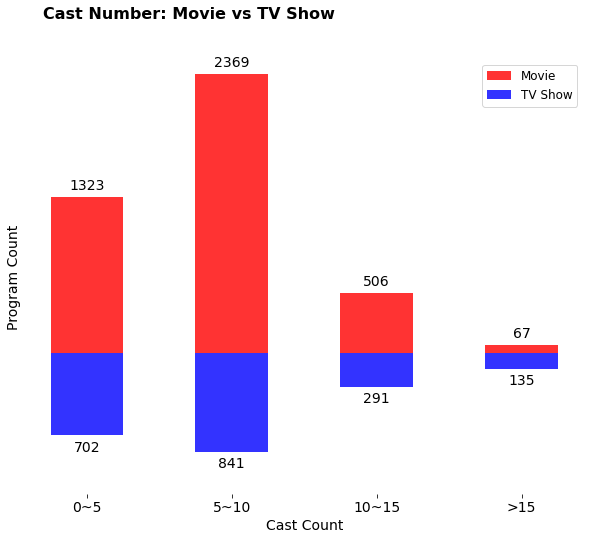

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(movie_cast_cnt_group.index, movie_cast_cnt_group.values, color='red', 
       width=0.5, alpha=0.8,label='Movie')
ax.bar(tv_cast_cnt_group.index, tv_cast_cnt_group['cast_cnt_group'], color='blue', 
       width = 0.5,alpha=0.8,label='TV Show')
ax.set_ylim(-1200,2500)

for g in movie_cast_cnt_group.index:
    ax.annotate(f"{movie_cast_cnt_group.loc[g]}",
                xy = (g,movie_cast_cnt_group.loc[g]+100),
                va = 'center',ha='center',fontsize=14)

for g in tv_cast_cnt_group.index:
    ax.annotate(f"{-tv_cast_cnt_group.loc[g,'cast_cnt_group']}",
                xy = (g,tv_cast_cnt_group.loc[g,'cast_cnt_group']-100),
                va = 'center',ha='center',fontsize=14)

for pos in ['left','right','top','bottom']:
    ax.spines[pos].set_color(None)
    
ax.set_ylabel('Program Count',fontsize=14)
ax.set_xlabel('Cast Count',fontsize=14)
ax.set_xticklabels(cnt_group_order,rotation=0,fontsize=14)
ax.set_yticks([])
fig.text(0.15, 0.95, 'Cast Number: Movie vs TV Show', fontsize=16, fontweight='bold') 
ax.legend(fontsize=12)

The distribution of cast number is almost same.

# Country

In [20]:
def country_cnt(country):
    if country=='nan':
        return 'unknown'
    
    return len(country.split(','))

In [21]:
data['country_cnt'] = data['country'].astype(str).apply(lambda x: country_cnt(x))
data['country_cnt'] = data['country_cnt'].apply(lambda x: '>6' if x==7 or x==10 or x==12 else x )
country_cnt_group = data['country_cnt'].value_counts()
trace = go.Pie(labels = country_cnt_group.index, 
               values = country_cnt_group.values,
               hoverinfo = 'percent+value+label',
               textinfo = 'percent',
               textposition = 'inside',
               textfont = dict(size=14),
               title = 'Produce Country Count',
               titlefont = dict(size=15),
               hole = 0.6,
               showlegend = True,
               marker = dict(line=dict(color='black',width=2)))
fig = go.Figure(data=[trace])
fig.show()

Most of the programs are produced by single country.

Text(0.13, 0.95, 'Top10 Most Frequent Producer Countries')

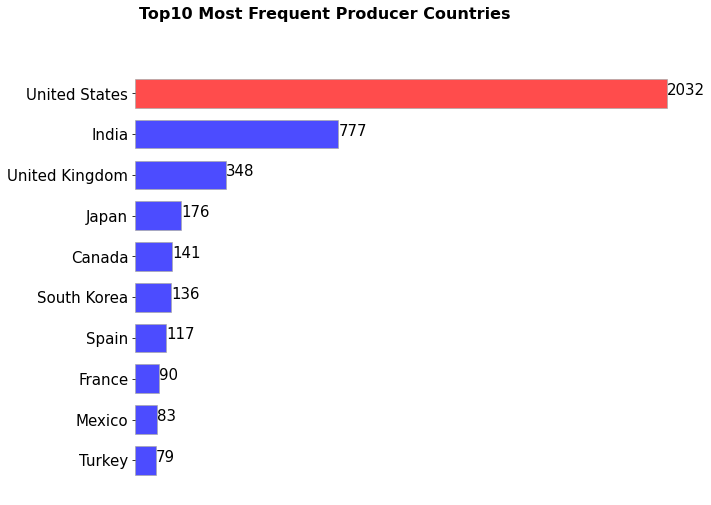

In [22]:
country_cnt = data.country.value_counts().head(10)
colors = [(0,0,1)]*10
colors[0] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.barh(country_cnt.index,country_cnt.values,
        height=0.7, edgecolor='darkgrey',color=colors, alpha=0.7)
ax.set_yticklabels(country_cnt.index,fontsize=15)
#ax.set_xticks(range(0,2035,500))
ax.set_xticks([])

for i in ax.patches:
    #print(i.get_width(),i.get_y())
    ax.text(i.get_width()+.4, i.get_y()+.38,
            str(i.get_width()), 
            fontsize=15, color='black')
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='x',linestyle='-',alpha=0.4)
ax.invert_yaxis()
fig.text(0.13, 0.95, 'Top10 Most Frequent Producer Countries', fontsize=16, fontweight='bold')

** This result comes from the programs which are produced by single country.

Most of the programs are produced at US.

# Date_Added & Release Year

In [23]:
data_dropped_nan_date = data.dropna(subset=['date_added'])
data_dropped_nan_date['year_added'] = data_dropped_nan_date['date_added'].apply(lambda x: x.split(',')[1])
data_dropped_nan_date['month_added'] = data_dropped_nan_date['date_added'].apply(lambda x: re.findall('[A-Za-z]+',x)[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Month Added

Text(0.13, 0.95, 'Programs Added Count in Month')

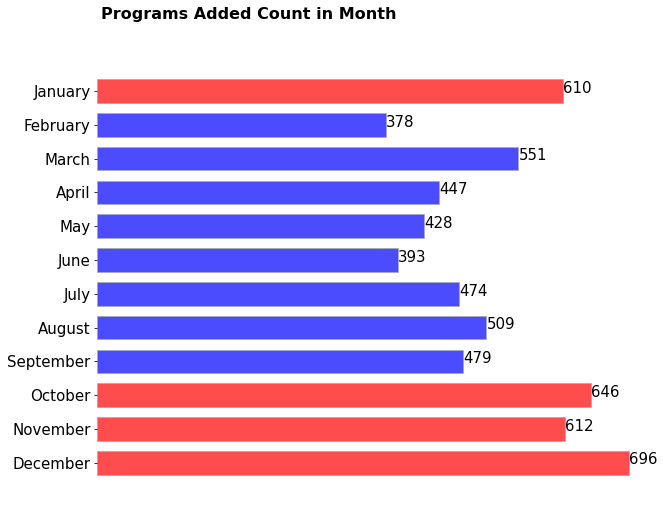

In [24]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
month = data_dropped_nan_date['month_added'].value_counts(sort=False).reindex(month_order)
#month = month.reindex(month_order)

colors = [(0,0,1)]*12
colors[0] = colors[-1] = colors[-2] = colors[-3] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.barh(month.index,month.values,
        height=0.7, edgecolor='darkgrey',color=colors, alpha=0.7)
ax.set_yticklabels(month.index,fontsize=15)
#ax.set_xticks(range(0,701,100))
ax.set_xticks([])

for i in ax.patches:
    #print(i.get_width(),i.get_y())
    ax.text(i.get_width()+.3, i.get_y()+.4,
            str(i.get_width()), 
            fontsize=15, color='black')
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='x',linestyle='-',alpha=0.4)
ax.invert_yaxis()
fig.text(0.13, 0.95, 'Programs Added Count in Month', fontsize=16, fontweight='bold')

It looks like Netflix preferred to add more programs at the end of year/winter. 

## Year Added

Text(0.13, 0.93, 'Programs Added Count in Year')

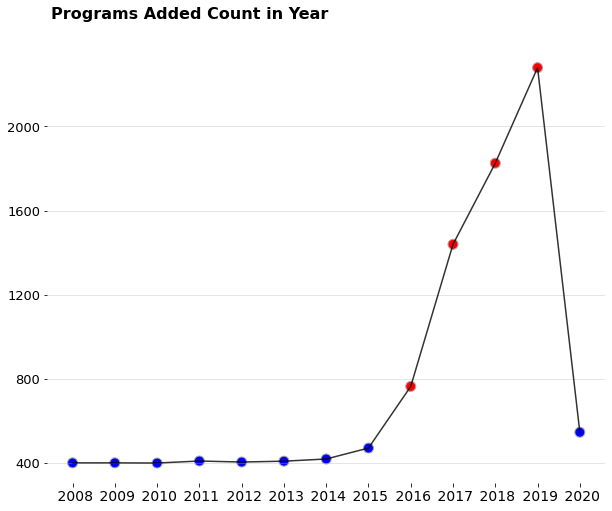

In [25]:
year_order = [' '+str(i) for i in range(2008,2021)]
year = data_dropped_nan_date['year_added'].value_counts(sort=False).reindex(year_order)

colors = [(0,0,1)]*13
colors[-2] = colors[-3] = colors[-4] = colors[-5] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(year.index, year.values,color='black',alpha=0.8)
ax.scatter(x=year.index, y=year.values, c=colors, s=100, marker='o',edgecolor='darkgray')
ax.set_xticklabels(year.index,fontsize=14)
ax.set_yticklabels(range(0,2401,400),fontsize=13)

for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='y',linestyle='-',alpha=0.4)
fig.text(0.13, 0.93, 'Programs Added Count in Year', fontsize=16, fontweight='bold')

Most of the programs are added betwen 2016-2019

## Year Added and Released Diff 

In [26]:
def diff_group(y):
    if y<0:
        return 'added before released'
    elif y>=0 and y<5:
        return 'added in less 5 years after released'
    elif y>=5 and y<10:
        return 'added in 5-10 years after released'
    elif y>=10 and y<20:
        return 'added in 10-20 years after released'
    else:
        return 'added more than 20 years after released'

In [27]:
data['add_release_diff'] = data_dropped_nan_date['year_added'].astype(int)-data_dropped_nan_date['release_year']
data['add_release_diff_group'] = data['add_release_diff'].apply(lambda x: diff_group(x))
diff_group = data['add_release_diff_group'].value_counts()

trace = go.Pie(labels = diff_group.index, 
               values = diff_group.values,
               hoverinfo = 'percent+value+label',
               textinfo = 'percent',
               textposition = 'inside',
               textfont = dict(size=14),
               title = 'Year Added and Released Diff',
               titlefont = dict(size=15),
               hole = 0.6,
               showlegend = True,
               marker = dict(line=dict(color='black',width=2)))
fig = go.Figure(data=[trace])
fig.show()

Most of the programs are added in less than 5 years after released on Netflix in 2019.

# Rating

According to the classification rule available on https://help.netflix.com/en/node/2064, I classify these ratings into three groups: kids,teens,adults.

In [28]:
def rating_group(rating):
    if rating in ['G','TV-G','TV-Y']:
        return 'Kids'
    
    elif rating in ['TV-Y7','TV-Y7-FV','PG','TV-PG']:
        return 'Older Kids'
    
    elif rating in ['PG-13','TV-14',]:
        return 'Teens'
    
    elif rating in ['R','TV-MA','NC-17']:
        return 'Adults'
    
    elif not rating or rating in ['UR','NR']:
        return 'Not Rated/Unrated'

In [29]:
data['rating_group'] = data['rating'].apply(lambda x: rating_group(x))
kids = data[data.rating_group == 'Kids']
older_kids = data[data.rating_group == 'Older Kids']
teens = data[data.rating_group == 'Teens']
adults = data[data.rating_group == 'Adults']
unrated = data[data.rating_group == 'Not Rated/Unrated']

Text(0.14, 1, 'Programs Count in Different Classes')

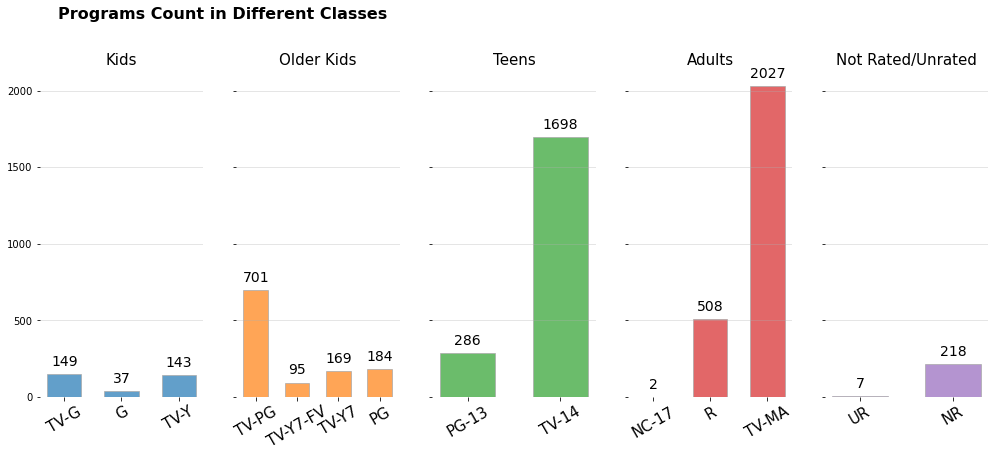

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(17,6),sharey='row')
for i, d in enumerate([kids,older_kids,teens,adults,unrated]):
    rating_cnt_group = d.rating.value_counts(sort=False)
    ax[i].bar(rating_cnt_group.index,rating_cnt_group.values,
            width=0.6,edgecolor='darkgrey',color=sns.color_palette()[i], alpha=0.7)
    ax[i].set_xticklabels(rating_cnt_group.index,fontsize=15,rotation=30)
    ax[i].set_yticks(range(0,2100,500))

    for g in rating_cnt_group.index:
        ax[i].annotate(f"{rating_cnt_group.loc[g]}",
                    xy = (g,rating_cnt_group.loc[g]+80),
                    va = 'center',ha='center',fontsize=14)

    for pos in ['left','right','bottom','top']:
        ax[i].spines[pos].set_color(None)

    ax[i].grid(axis='y',linestyle='-',alpha=0.4)
    #ax.invert_yaxis()
    ax[i].set_title(d.rating_group.unique()[0],fontsize=15)

fig.text(0.14, 1, 'Programs Count in Different Classes', fontsize=16, fontweight='bold')

There are still lots of programs which are suitable for kids. Netflix did a good job in balancing programs of different ratings.

# Duration

In [31]:
data_copy = data.copy()
data_copy['duration_split_value'] = data_copy['duration'].apply(lambda x: x.split(' ')[0])
data_copy['duration_split_unit'] = data_copy['duration'].apply(lambda x: x.split(' ')[1])
in_min = data_copy[data_copy.duration_split_unit=='min']

## Duration Time In Minutes

In [32]:
in_min.type.value_counts()

Movie    4265
Name: type, dtype: int64

All the programs which has duration counting in minutes are movies

Text(0.22, 0.93, 'Distribution of Movie Duration Time')

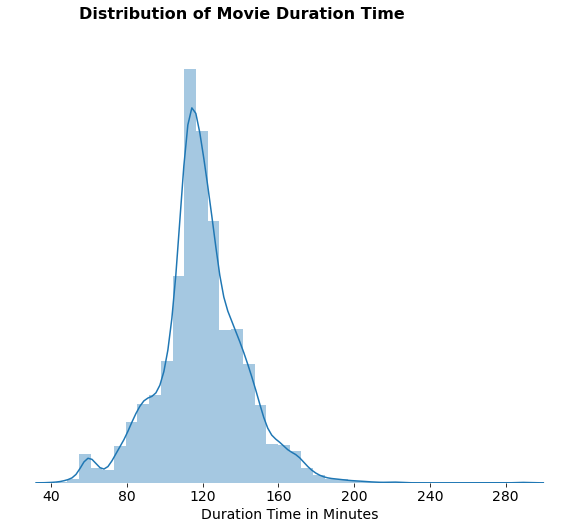

In [33]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(in_min.duration_split_value.astype(int),bins=40,ax=ax)
ax.set_xticklabels(np.arange(0,321,40),fontsize=14)
ax.set_xlabel('Duration Time in Minutes',fontsize=14)
ax.set_yticks([])

for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)

ax.grid(axis='y',linestyle='-',alpha=0.4)
fig.text(0.22, 0.93, 'Distribution of Movie Duration Time', fontsize=16, fontweight='bold')

Most of the movies are in 80 to 160 minutes

Text(0.13, 0.93, 'Movie Duration Time w.r.t. Number of Actors')

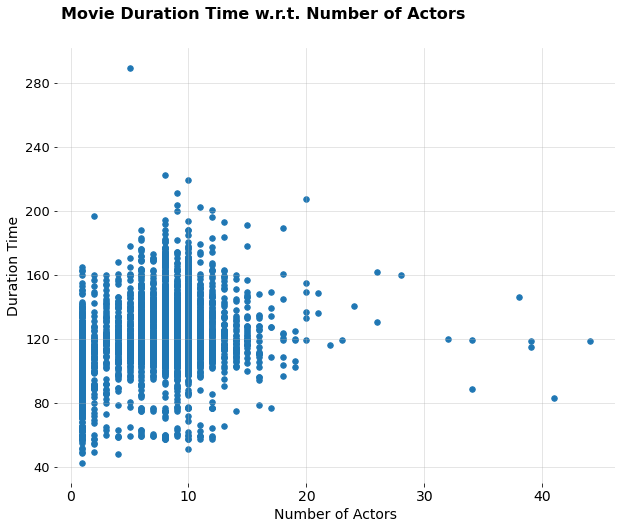

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(in_min.cast_cnt,in_min.duration_split_value.astype(int),s=30)
ax.set_yticklabels(np.arange(0,321,40),fontsize=13)
ax.set_xlabel('Number of Actors',fontsize=14)
ax.set_ylabel('Duration Time',fontsize=14)
plt.xticks(fontsize=14)

for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='both',linestyle='-',alpha=0.4)
fig.text(0.13, 0.93, 'Movie Duration Time w.r.t. Number of Actors', fontsize=16, fontweight='bold')

There is no strong relationship between number of actors and duration time.

## Duration Time in Season

In [35]:
in_season = data_copy[data_copy.duration_split_unit!='min']
in_season.type.value_counts()

TV Show    1969
Name: type, dtype: int64

All the programs which has duration time counting in season are TV shows.

In [36]:
def season_group(cnt):
    if cnt<=5:
        return str(cnt) 
    elif cnt>5 and cnt<=10:
        return '6~10'
    else:
        return '>10'

In [37]:
in_season['season_group'] = in_season['duration_split_value'].astype(int).apply(lambda x: season_group(x))
season_cnt_order = ['1','2','3','4','5','6~10','>10']
season_cnt = in_season.season_group.value_counts().reindex(season_cnt_order)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Number of Seasons of TV Shows')

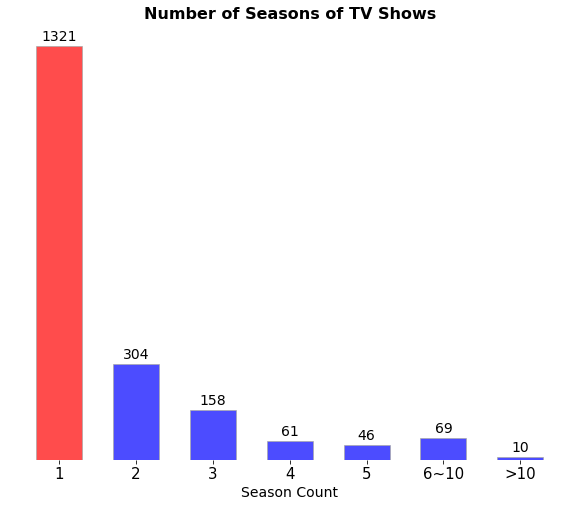

In [38]:
colors = [(0,0,1)]*7
colors[0] = (1,0,0)
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(season_cnt.index,season_cnt.values,
        width=0.6,edgecolor='darkgrey',color=colors, alpha=0.7)
ax.set_xticklabels(season_cnt.index,fontsize=15)
ax.set_yticks([])
ax.set_xlabel('Season Count',fontsize=14)

for g in season_cnt.index:
    ax.annotate(f"{season_cnt.loc[g]}",
                xy = (g,season_cnt.loc[g]+30),
                va = 'center',ha='center',fontsize=14)
    
for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_title('Number of Seasons of TV Shows',fontsize=16,fontweight='bold')

It looks like many TV shows now only updated for 1 season on Netflix in 2019. The reason may be that most of the programs are added between 2016 to 2019 according to previous conclusion.

Text(0.14, 0.93, 'Number of Seasons w.r.t. Number of Actors')

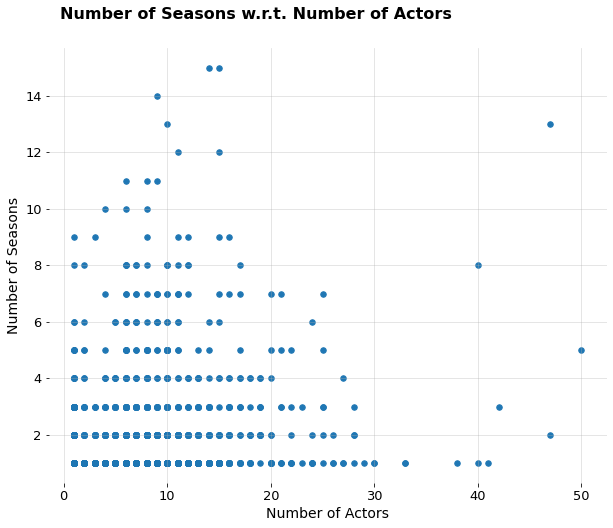

In [39]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(in_season.cast_cnt,in_season.duration_split_value.astype(int),s=30)
#ax.set_yticklabels(np.arange(0,16,1),fontsize=13)
ax.set_xlabel('Number of Actors',fontsize=14)
ax.set_ylabel('Number of Seasons',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for pos in ['left','right','bottom','top']:
    ax.spines[pos].set_color(None)
    
ax.grid(axis='both',linestyle='-',alpha=0.4)
fig.text(0.14, 0.93, 'Number of Seasons w.r.t. Number of Actors', fontsize=16, fontweight='bold')

Similarly, there are no strong relationship between number of seasons and number of actors.

# Genere(listed_in)

In [40]:
movies = data[data.type=='Movie']
tvs = data[data.type=='TV Show']

In [41]:
def get_top5_generes(data):
    all_genere = []
    for t in data['listed_in']:
        genere = t.split(',')
        genere = [g.strip() for g in genere]
        all_genere += genere
    
    genere_cnt = pd.DataFrame(pd.DataFrame(all_genere).value_counts())
    all_idx = [idx[0] for idx in genere_cnt.index]
    genere_cnt['genere'] = all_idx
    genere_cnt.columns = ['cnt','genere']
    top10_genere = genere_cnt.head(5)
    return top10_genere

Text(0.3, 0.99, 'Top5 Most Frequent Genere Tags')

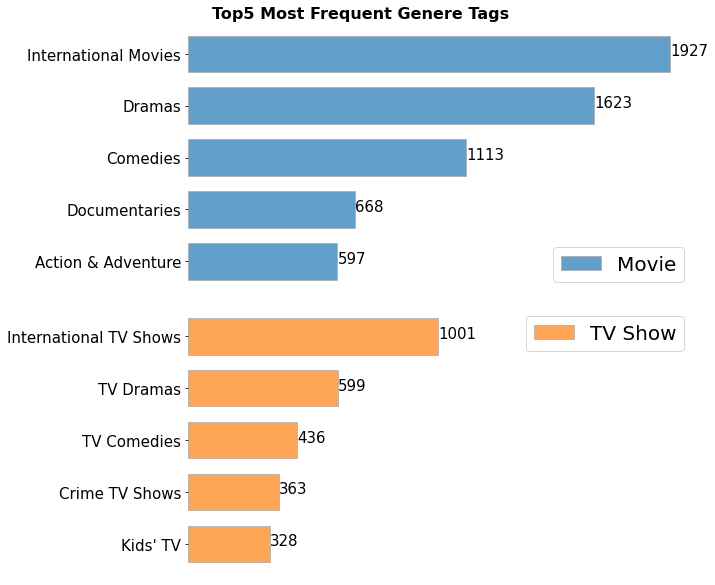

In [42]:
movie_top5_genere = get_top5_generes(movies)
tv_top5_genere = get_top5_generes(tvs)
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8),sharex='col')
labels = ['Movie','TV Show']
for i,top10_genere in enumerate([movie_top5_genere,tv_top5_genere]):
    ax[i].barh(top10_genere.genere,top10_genere.cnt,
            height=0.7, edgecolor='darkgrey',color=sns.color_palette()[i], alpha=0.7,label=labels[i])
    ax[i].set_yticklabels(top10_genere.genere,fontsize=15)
    ax[i].set_xticks([])

    for j in ax[i].patches:
        #print(i.get_width(),i.get_y())
        ax[i].text(j.get_width()+.3, j.get_y()+.38,
                str(j.get_width()), 
                fontsize=15, color='black')

    for pos in ['left','right','bottom','top']:
        ax[i].spines[pos].set_color(None)

    ax[i].grid(axis='x',linestyle='-',alpha=0.4)
    ax[i].invert_yaxis()
    #ax[i].set_title('Top5 Most Frequent Genere Tags',fontsize=16, fontweight='bold')
    ax[i].legend(fontsize=20)
    
fig.tight_layout()
fig.text(0.3, 0.99, 'Top5 Most Frequent Genere Tags', fontsize=16, fontweight='bold') 

International Movies/TV Shows and Dramas are the most frequent genere tags

In [43]:
movies['genere'] = movies['listed_in'].apply(lambda x: [t.strip() for t in x.split(',')])
mlb = MultiLabelBinarizer()
labeled_movie_genere = mlb.fit_transform(movies['genere'])
df_movie_genere = pd.DataFrame(labeled_movie_genere,columns=mlb.classes_, index=movies['genere'].index)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Correlation between Movies')

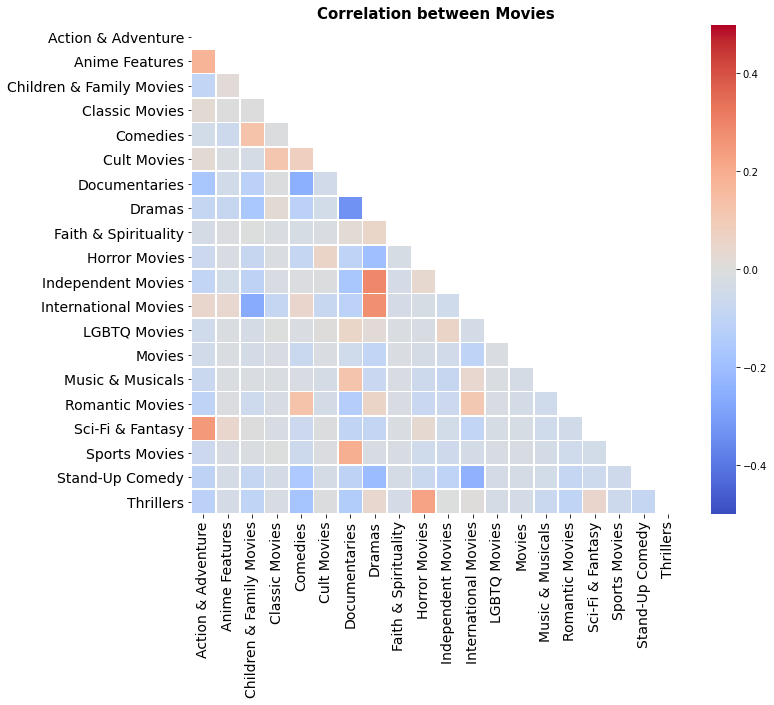

In [44]:
movie_corr = df_movie_genere.corr()
mask = np.zeros_like(movie_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(movie_corr, mask=mask, cmap= "coolwarm", 
            vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,ax=ax)
            #cbar_kws={"shrink": 0.6}
ax.set_xticklabels(mlb.classes_,fontsize=14)
ax.set_yticklabels(mlb.classes_,fontsize=14)
ax.set_title('Correlation between Movies',fontsize=15,fontweight='bold')

1. Horror Movies are positively correlated with Thrillers. Sci-Fi Moviess are positively correlated with Action Movies
2. Drama are negatively correleated with documentaries

In [45]:
tvs['genere'] = tvs['listed_in'].apply(lambda x: [t.strip() for t in x.split(',')])
mlb = MultiLabelBinarizer()
labeled_tv_genere = mlb.fit_transform(tvs['genere'])
df_tv_genere = pd.DataFrame(labeled_tv_genere,columns=mlb.classes_, index=tvs['genere'].index)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Correlation between TV Shows')

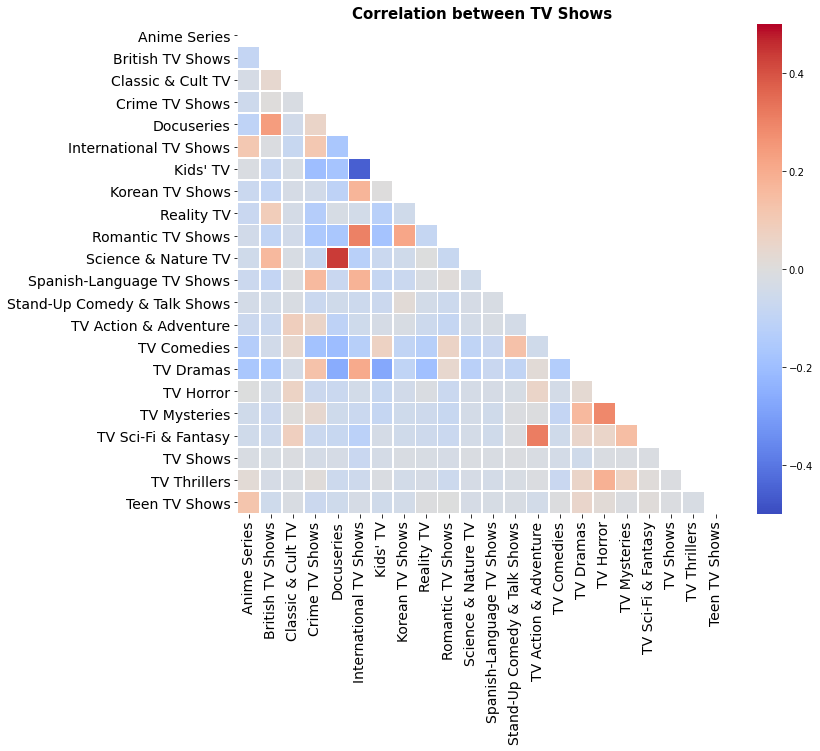

In [46]:
tv_corr = df_tv_genere.corr()
mask = np.zeros_like(tv_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(tv_corr, mask=mask, cmap= "coolwarm", 
            vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,ax=ax)
            #cbar_kws={"shrink": 0.6}
ax.set_xticklabels(mlb.classes_,fontsize=14)
ax.set_yticklabels(mlb.classes_,fontsize=14)
ax.set_title('Correlation between TV Shows',fontsize=15,fontweight='bold')

1. Science and Natural TV shows are highly positively correlated with docuseries
2. Kids TV are highly negatively correlated with International TV Shows